### Importing necessary libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import  StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import log_loss, accuracy_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

####  Reading the CSV file into a DataFrame

##### # Checking data types of columns


In [2]:
df = pd.read_csv("Churn_Predictn.csv")
df.dtypes

INCOME                               float64
HAS_CHILDREN                         float64
LENGTH_OF_RESIDENCE                  float64
HOME_OWNER                             int64
COLLEGE_DEGREE                         int64
GOOD_CREDIT                            int64
CURR_ANN_AMT                         float64
DAYS_TENURE                          float64
AGE_IN_YEARS                         float64
CHURN                                  int64
MARITAL_STATUS_Single                   bool
HOME_MARKET_VALUE_100000 - 124999       bool
HOME_MARKET_VALUE_1000000 Plus          bool
HOME_MARKET_VALUE_125000 - 149999       bool
HOME_MARKET_VALUE_150000 - 174999       bool
HOME_MARKET_VALUE_175000 - 199999       bool
HOME_MARKET_VALUE_200000 - 224999       bool
HOME_MARKET_VALUE_225000 - 249999       bool
HOME_MARKET_VALUE_25000 - 49999         bool
HOME_MARKET_VALUE_250000 - 274999       bool
HOME_MARKET_VALUE_275000 - 299999       bool
HOME_MARKET_VALUE_300000 - 349999       bool
HOME_MARKE

#### # Checking for missing values


In [3]:
df.isna().sum()

INCOME                               0
HAS_CHILDREN                         0
LENGTH_OF_RESIDENCE                  0
HOME_OWNER                           0
COLLEGE_DEGREE                       0
GOOD_CREDIT                          0
CURR_ANN_AMT                         0
DAYS_TENURE                          0
AGE_IN_YEARS                         0
CHURN                                0
MARITAL_STATUS_Single                0
HOME_MARKET_VALUE_100000 - 124999    0
HOME_MARKET_VALUE_1000000 Plus       0
HOME_MARKET_VALUE_125000 - 149999    0
HOME_MARKET_VALUE_150000 - 174999    0
HOME_MARKET_VALUE_175000 - 199999    0
HOME_MARKET_VALUE_200000 - 224999    0
HOME_MARKET_VALUE_225000 - 249999    0
HOME_MARKET_VALUE_25000 - 49999      0
HOME_MARKET_VALUE_250000 - 274999    0
HOME_MARKET_VALUE_275000 - 299999    0
HOME_MARKET_VALUE_300000 - 349999    0
HOME_MARKET_VALUE_350000 - 399999    0
HOME_MARKET_VALUE_400000 - 449999    0
HOME_MARKET_VALUE_450000 - 499999    0
HOME_MARKET_VALUE_50000 -

#### # Splitting the data into training and testing sets


In [4]:
train, test = train_test_split(df, test_size=0.25, stratify= df["CHURN"], random_state=23)

#### # Displaying the percentage distribution of the target variable in the training set


In [5]:
train.CHURN.value_counts(normalize=True)*100

CHURN
1    78.864938
0    21.135062
Name: proportion, dtype: float64

##### # Displaying the shapes of training and testing sets


In [6]:
train.shape

(412277, 29)

In [7]:
test.shape

(137426, 29)

#### # Separating features (x) and target (y) from the training set


In [8]:
x = train.drop("CHURN", axis=1)
y = train["CHURN"]

#### # Visualizing the distribution of the target variable using a histogram


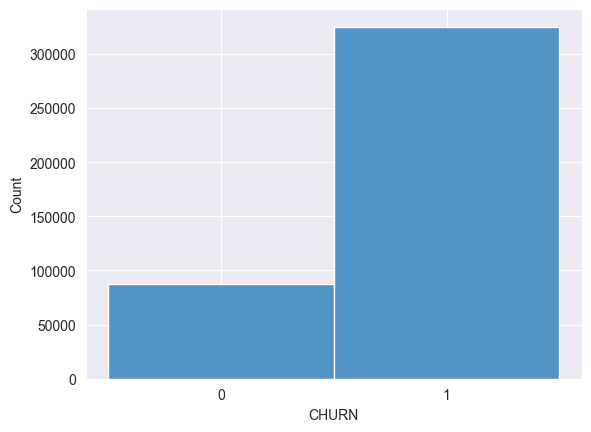

In [9]:
sns.set_style("darkgrid")
sns.histplot(y.astype(str))
plt.show()

#### # Creating a StratifiedKFold object for cross-validation


In [10]:
kfold = StratifiedKFold(n_splits=3,shuffle=True,random_state=23)

###  Initializing models and their hyperparameter search spaces


In [11]:
# Decision Tree

dtc = DecisionTreeClassifier()
dtc.get_params()

dtc_params = {'max_depth':[None,3,4,5,6,7,8],'min_samples_split':[2,5,10,20],'min_samples_leaf':[1,5,10,20]}
gcv_dtc = GridSearchCV(dtc,param_grid=dtc_params,cv=kfold,scoring='neg_log_loss',verbose=3,n_jobs=-1)

In [12]:
# Random Forest Classifier

rf = RandomForestClassifier()
rf.get_params()

rf_params = {'max_depth':[None,3,4],'max_features':[5,10,15,20],'n_estimators':[100,200,300,400]}
gcv_rf = GridSearchCV(rf,param_grid=rf_params,cv=kfold,scoring='neg_log_loss',verbose=3,n_jobs=-1)

In [14]:
# XGBoost

xgb = XGBClassifier()
xgb.get_params()

xgb_params = {'learning_rate':np.linspace(0.001,0.5,5),'max_depth':[None,2,5],'n_estimators':[100,200]}
gcv_xgb = GridSearchCV(xgb,param_grid=xgb_params,cv=kfold,scoring='neg_log_loss',verbose=3,n_jobs=-1)


### Fitting the models using grid search


In [15]:
# Decision Tree fit

gcv_dtc.fit(x,y)

print(gcv_dtc.best_params_,gcv_dtc.best_score_)

Fitting 3 folds for each of 112 candidates, totalling 336 fits
{'max_depth': None, 'min_samples_leaf': 10, 'min_samples_split': 10} -0.37311222360946134


In [16]:
# Random Forest fit

gcv_rf.fit(x,y)

print(gcv_rf.best_params_,gcv_rf.best_score_)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
{'max_depth': None, 'max_features': 10, 'n_estimators': 400} -0.36854339370421413


In [17]:
# XGBoost fit

gcv_xgb.fit(x,y)

print(gcv_xgb.best_params_,gcv_xgb.best_score_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
{'learning_rate': 0.5, 'max_depth': None, 'n_estimators': 200} -0.3603307010177657


#### # Preparing test data for prediction


In [19]:
test_x = test.drop("CHURN", axis=1)
test_y = test["CHURN"]

#### # Evaluating models on the test set


In [20]:
print(gcv_dtc.best_estimator_)
best_dtc = gcv_dtc.best_estimator_
dtc_pred = best_dtc.predict(test_x)
accuracy_score(test_y, dtc_pred)

DecisionTreeClassifier(min_samples_leaf=10, min_samples_split=10)


0.855274838822348

In [21]:
print(gcv_rf.best_estimator_)
best_rf = gcv_rf.best_estimator_
rf_pred = best_rf.predict(test_x)
accuracy_score(test_y, rf_pred)

RandomForestClassifier(max_features=10, n_estimators=400)


0.8570212332455285

In [22]:
print(gcv_xgb.best_estimator_)
best_xgb = gcv_xgb.best_estimator_
xgb_pred = best_xgb.predict(test_x)
accuracy_score(test_y, xgb_pred)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


0.8551438592406095

### Printing accuracy and log_loss for the best Random Forest model


In [48]:
prediction=best_rf.predict(test_x)
print("Accuracy Score : ",'{0:.2%}'.format(accuracy_score(test_y,prediction)))
print("log_loss : ",(log_loss(test_y,(best_rf.predict_proba(test_x))[:,1])))

Accuracy Score :  85.70%
log_loss :  0.3550319305151618


### Saving the best Random Forest model using pickle


In [1]:
import pickle

In [58]:
filename = 'churn_prediction_model.sav'
pickle.dump(best_rf, open(filename, 'wb'))

In [2]:
# loading the saved model
loaded_model = pickle.load(open('churn_prediction_model.sav', 'rb'))

### Extracting feature importances and creating a sorted importances plot


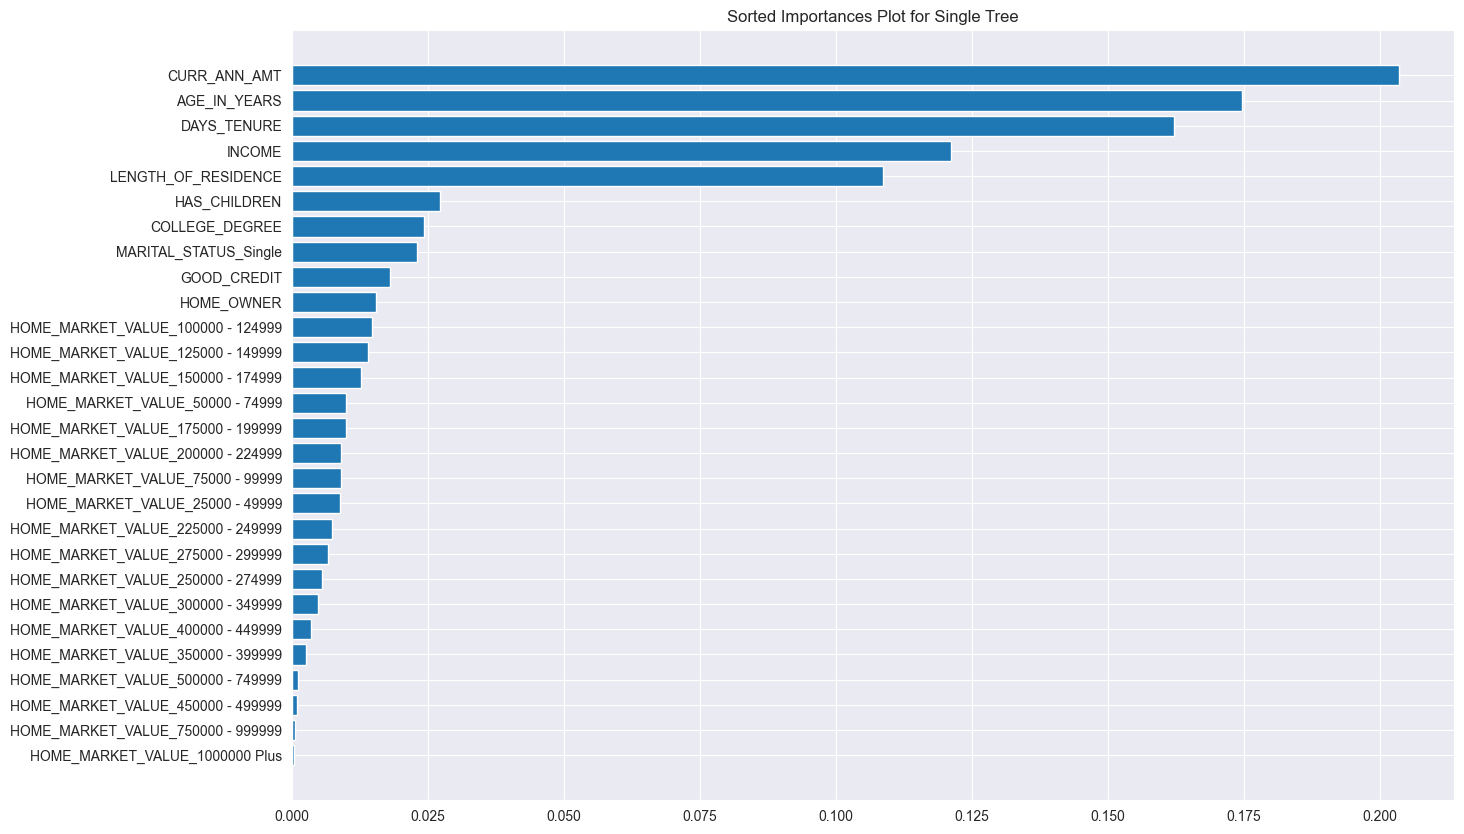

In [60]:
feature = loaded_model.feature_importances_
cols = list(x.columns)
imp_df = pd.DataFrame({'feature':cols,
                       'importance':feature})
imp_df.sort_values(by='importance', inplace=True)
plt.figure(figsize=(15,10))
plt.title("Sorted Importances Plot for Single Tree")
plt.barh(imp_df['feature'], imp_df['importance'])
plt.show()